In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [12]:
df = pd.read_csv('accord_sedan.csv',delimiter=',')
#print(df)
#normalization

df.loc[(df.year == 2006), ['year']] = 1
df.loc[(df.transmission == 'Manual'), ['transmission']] = 0
df.loc[(df.transmission == 'Automatic'), ['transmission']] = 1
df.loc[(df.engine == '4 Cyl'), ['engine']] = 0
df.loc[(df.engine == '6 Cyl'), ['engine']] = 1
df.loc[(df.trim == 'ex'), ['trim']] = 0
df.loc[(df.trim == 'lx'), ['trim']] = 1
df.loc[(df.trim == 'exl'), ['trim']] = 2
dfNorm=(df-df.min())/(df.max()-df.min())
dfNorm['year']=1
dfNorm

,price,mileage,year,trim,engine,transmission
0,0.669285,0.373049,1,0,0,0
1,0.420670,0.419479,1,0,0,0
2,0.421579,0.470014,1,0.5,0,1
3,0.503927,0.514461,1,0.5,0,1
4,0.366515,0.464587,1,0.5,0,1
...,...,...,...,...,...,...
412,0.459363,0.372027,1,0.5,0,1
413,0.338570,0.389020,1,0,0,1
414,0.752377,0.452213,1,1,0,1
415,0.644895,0.328432,1,0,0,1


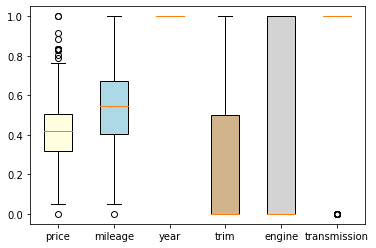

In [13]:
box_plot_data=[dfNorm.price,dfNorm.mileage,dfNorm.year,dfNorm.trim,dfNorm.engine,dfNorm.transmission]
Features=['price','mileage','year','trim','engine','transmission']
box=plt.boxplot(box_plot_data,patch_artist=True,labels=Features)
colors = ['lightyellow', 'lightblue', 'lightgreen', 'tan','lightgray','pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

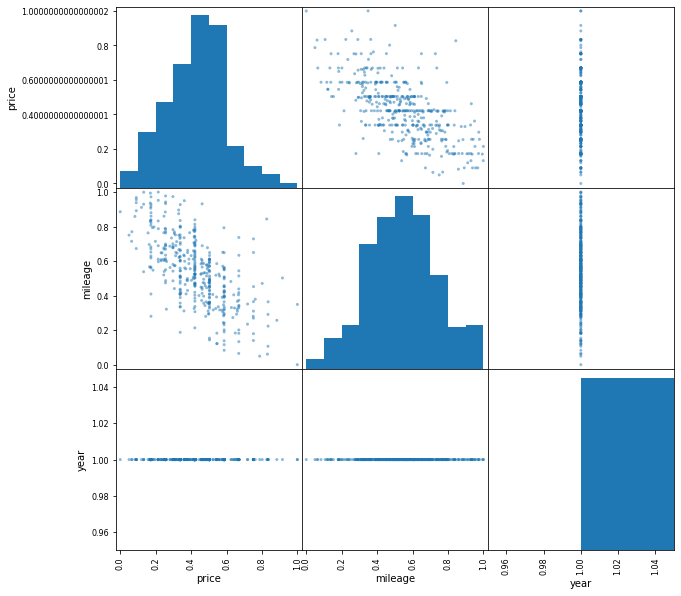

In [15]:
#dff=df.drop('diagnosis',axis=1)
scatter_matrix(dfNorm,figsize=(10,10))
plt.show()

In [47]:
OutlierPrice=[0]*417
OutlierMileage=[0]*417
df['OutlierPrice']=OutlierPrice
df['OutlierMileage']=OutlierMileage
df['Num']=np.arange(1,418,1)
#mean
Mean=df.price.mean()
#STD=df.std()
df.loc[(df.price >= df.price.mean()+2*df.price.std()), ['OutlierPrice']] = 1
df.loc[(df.price <= df.price.mean()-2*df.price.std()), ['OutlierPrice']] = 1
df.loc[(df.mileage >= df.mileage.mean()+2*df.mileage.std()), ['OutlierMileage']] = 1
df.loc[(df.mileage <= df.mileage.mean()-2*df.mileage.std()), ['OutlierMileage']] = 1
df

,price,mileage,year,trim,engine,transmission,OutlierPrice,OutlierMileage,Num
0,14995,67697,1,0,0,0,0,0,1
1,11988,73738,1,0,0,0,0,0,2
2,11999,80313,1,1,0,1,0,0,3
3,12995,86096,1,1,0,1,0,0,4
4,11333,79607,1,1,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...
412,12456,67564,1,1,0,1,0,0,413
413,10995,69775,1,0,0,1,0,0,414
414,16000,77997,1,2,0,1,0,0,415
415,14700,61892,1,0,0,1,0,0,416


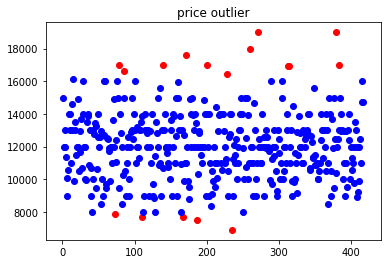

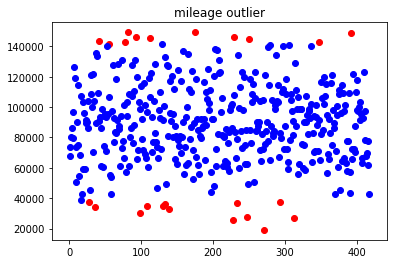

In [51]:
# Outlier detection
dfOP=df.loc[(df.OutlierPrice == 1)]
dfP=df.loc[(df.OutlierPrice == 0)]
dfOM=df.loc[(df.OutlierMileage == 1)]
dfM=df.loc[(df.OutlierMileage == 0)]
# detrmine X for plot
X1=dfOP.Num
X2=dfP.Num
X3=dfOM.Num
X4=dfM.Num
#X1=np.arange(1,dfOP.price.count()+1,1)
#X2=np.arange(1,dfP.price.count()+1,1)
#X3=np.arange(1,dfOM.price.count()+1,1)
#X4=np.arange(1,dfM.price.count()+1,1)
# plot scatter
plt.scatter(X1,dfOP.price , c='red')
plt.scatter(X2,dfP.price , c='blue')
plt.title('price outlier')
plt.show()
plt.scatter(X3,dfOM.mileage , c='red')
plt.scatter(X4,dfM.mileage , c='blue')
plt.title('mileage outlier')
plt.show()